# Tensorflow Regression and Classification Examples

<b>Contents:</b>
1. Regression - Simple Farenheit Example
2. Classification - Predict Earnings per Year (Using Preprocessing Layers)

# 1. Regression

### Import Libraries

In [107]:
import tensorflow as tf

In [108]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Training Data

In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


### Create Model

In [5]:
#l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

In [6]:
#model = tf.keras.Sequential([l0])

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

### Train the model

In [9]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


### Display Training Metrics

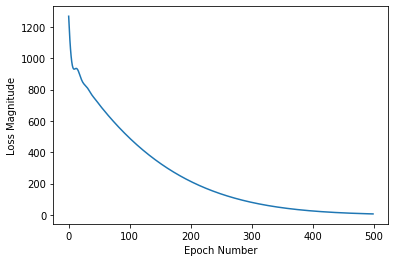

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

### Make Predictions

In [11]:
print(model.predict([100.0]))

[[211.33824]]


# 2. Classification Model

### Install libraries 

In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### Read data into dataframe

In [234]:
df = pd.read_csv('gs://crazy-hippo-01/dataset/census_train.csv')

### Remove rows with empty data points

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income_bracket  32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [236]:
df = df.dropna()

In [237]:
len(df)

30162

In [238]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Remove columns not to be used

In [239]:
#Remove columns
df_final = df[['age', 'workclass', 'occupation', 'education_num', 'marital_status', 'capital_gain', 'income_bracket']]

In [240]:
df_final.head()

,age,workclass,occupation,education_num,marital_status,capital_gain,income_bracket
0,39,State-gov,Adm-clerical,13,Never-married,2174,0
1,50,Self-emp-not-inc,Exec-managerial,13,Married-civ-spouse,0,0
2,38,Private,Handlers-cleaners,9,Divorced,0,0
3,53,Private,Handlers-cleaners,7,Married-civ-spouse,0,0
4,28,Private,Prof-specialty,13,Married-civ-spouse,0,0


### Create Training, Test and Validation splits

In [242]:
train, test = train_test_split(df_final, test_size=0.20, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

### Function to create a Tensorflow Dataset

In [243]:
def create_dataset(dataframe, shuffle=True, batch_size=5):
    dataframe = dataframe.copy()
    labels = dataframe.pop('income_bracket')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [246]:
# Testing Create Dataset function
batch_size = 5
train_ds = create_dataset(train, batch_size=batch_size)

In [245]:
# Example to show features and Training data as Tensors
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of ages:', train_features['occupation'])
print('A batch of targets:', label_batch )

Every feature: ['age', 'workclass', 'occupation', 'education_num', 'marital_status', 'capital_gain']
A batch of ages: tf.Tensor(
[b'Sales' b'Transport-moving' b'Craft-repair' b'Adm-clerical'
 b'Other-service'], shape=(5,), dtype=string)
A batch of targets: tf.Tensor([0 1 0 1 0], shape=(5,), dtype=int64)


### Preprocessing Layers Functions

Numeric Columns

In [247]:
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for our feature.
    normalizer = preprocessing.Normalization()

    # Prepare a Dataset that only yields our feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [248]:
# Testing Normalization Layer
age_col = train_features['age']
layer = get_normalization_layer('age', train_ds)
layer(age_col)


<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[ 0.88796675],
       [ 0.28032267],
       [ 1.1158333 ],
       [ 0.5841447 ],
       [-0.9349655 ]], dtype=float32)>

Categorical Columns

In [250]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
    # Create a StringLookup layer which will turn strings into integer indices
    if dtype == 'string':
        index = preprocessing.StringLookup(max_tokens=max_tokens)
    else:
        index = preprocessing.IntegerLookup(max_values=max_tokens)

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

    # Create a Discretization for our integer indices.
    encoder = preprocessing.CategoryEncoding(max_tokens=index.vocab_size())

    # Prepare a Dataset that only yields our feature.
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices.
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices. The lambda function captures the
    # layer so we can use them, or include them in the functional model later.
    return lambda feature: encoder(index(feature))

In [251]:
# Testing One-hot encoding Function
type_col = train_features['occupation']
layer = get_category_encoding_layer('occupation', train_ds, 'string')
layer(type_col)

<tf.Tensor: shape=(5, 16), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

### Create training, validation and test datasets

In [273]:
batch_size = 32
train_ds = create_dataset(train, batch_size=batch_size)
val_ds = create_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = create_dataset(test, shuffle=False, batch_size=batch_size)

### Create Preprocessing Layers

In [280]:
all_inputs = []
encoded_features = []

numerical = ['age' , 'capital_gain']
categorical_int_cols = ['education_num']
categorical_string_cols = ['occupation', 'workclass', 'marital_status']
target = ['income_bracket']

In [281]:
# Numeric features.
for header in numerical:
    numeric_col = tf.keras.Input(shape=(1,), name=header)
    normalization_layer = get_normalization_layer(header, train_ds)
    encoded_numeric_col = normalization_layer(numeric_col)
    all_inputs.append(numeric_col)
    encoded_features.append(encoded_numeric_col)

In [282]:
# Categorical features encoded as integers.
for header in categorical_int_cols:
    categorical_int_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
    encoding_layer = get_category_encoding_layer(header, train_ds, dtype='int64',
                                                 max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_int_col)
    all_inputs.append(categorical_int_col)
    encoded_features.append(encoded_categorical_col)

In [283]:
# Categorical features encoded as string.
for header in categorical_string_cols:
    categorical_string_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
    encoding_layer = get_category_encoding_layer(header, train_ds, dtype='string',
                                                   max_tokens=5)
    encoded_categorical_col = encoding_layer(categorical_string_col)
    all_inputs.append(categorical_string_col)
    encoded_features.append(encoded_categorical_col)

### Create, Compile and Train the Model

In [284]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

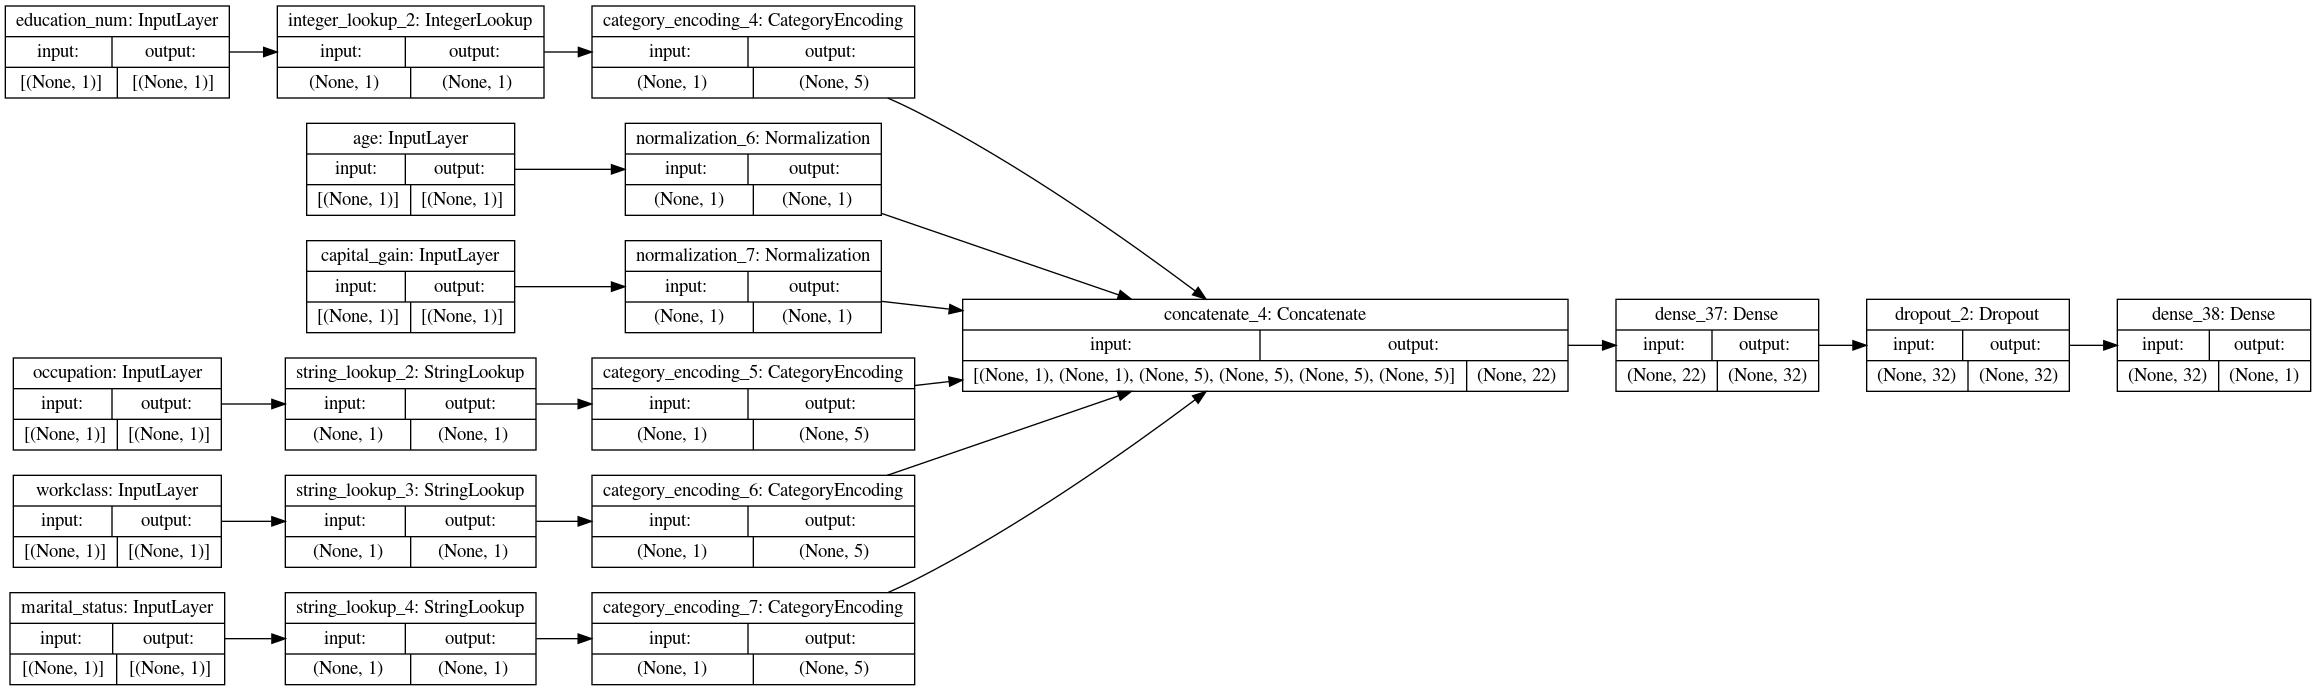

In [299]:
# rankdir='LR' is used to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [286]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
604/604 [==============================] - 3s 3ms/step - loss: 0.5061 - accuracy: 0.7708 - val_loss: 0.3735 - val_accuracy: 0.8023
Epoch 2/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8094 - val_loss: 0.3626 - val_accuracy: 0.8164
Epoch 3/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3748 - accuracy: 0.8155 - val_loss: 0.3578 - val_accuracy: 0.8245
Epoch 4/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3647 - accuracy: 0.8181 - val_loss: 0.3553 - val_accuracy: 0.8276
Epoch 5/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8276 - val_loss: 0.3558 - val_accuracy: 0.8201
Epoch 6/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3629 - accuracy: 0.8211 - val_loss: 0.3553 - val_accuracy: 0.8270
Epoch 7/10
604/604 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8252 - val_loss: 0.3549 - val_accuracy: 0.8193
Epoch 

In [287]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

189/189 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8333
Accuracy 0.8332504630088806


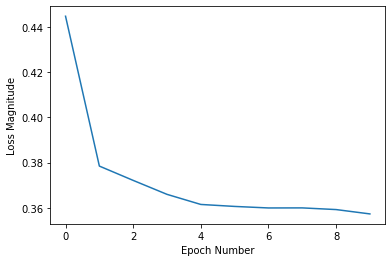

In [289]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [288]:
model.save('earnings_classifier')
reloaded_model = tf.keras.models.load_model('earnings_classifier')

In [297]:
sample = {
    'age': 50,
    'education_num': 8,
    'capital_gain': 0,
    'occupation': 'Exec-managerial',
    'workclass': 'Private',
    'marital_status': 'Married-civ-spouse',
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = reloaded_model.predict(input_dict)
prob = tf.nn.sigmoid(predictions[0])

print(
    "There is a %.1f percent probability "
    "of this person earning more than 50k a year." % (100 * prob)
)

There is a 71.8 percent probability of this person earning more than 50k a year.
